In [8]:
display(df)

,Produto,Dias_Promo,Volumes_Promo,Dias_SemPromo,Volumes_SemPromo,Diferença,proporção_volumes_em_promoção,proporção_dias_em_promoção
0,1,6,31,231,1201,0.993755,0.025162,0.025316
1,2,10,35,226,1203,0.657523,0.028271,0.042373
2,3,4,23,238,1279,1.069977,0.017665,0.016529
3,4,4,15,260,1376,0.708576,0.010784,0.015152
4,5,6,36,264,1471,1.076818,0.023889,0.022222
...,...,...,...,...,...,...,...,...
598,993,6,35,265,1511,1.023053,0.022639,0.022140
599,994,2,18,271,1450,1.682069,0.012262,0.007326
600,997,13,64,281,1487,0.930319,0.041264,0.044218
601,998,4,23,252,1423,1.018271,0.015906,0.015625


Coeficiente de Correlação de Pearson: 0.9543976727592876
1.0174323e-317


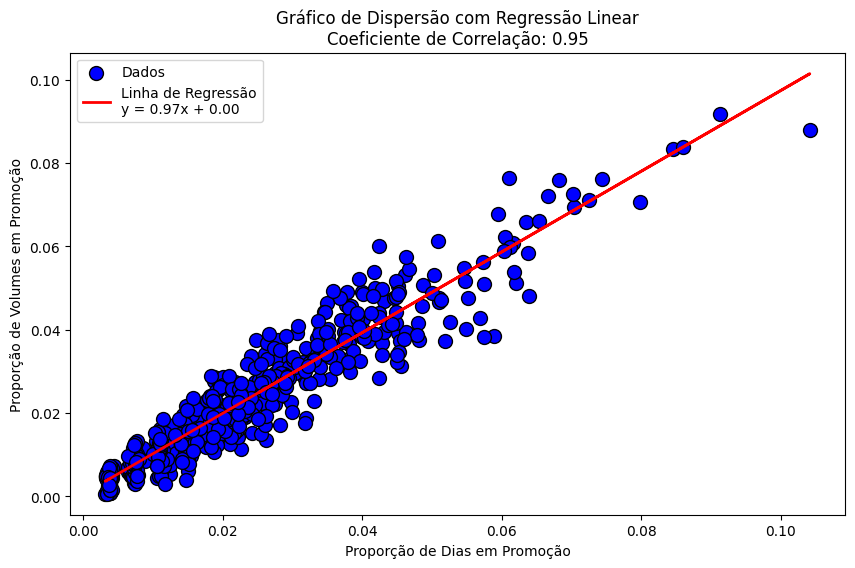

Coeficiente Angular (slope): 0.97
Intercepto: 0.00
R-quadrado (R²): 0.91
Valor-p: 0.00
Erro padrão: 0.01


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

# Supondo que você tenha um DataFrame df com suas colunas
df = pd.read_csv("DiferençaPromoçõesPython.csv", sep=";", encoding="latin1")

# Calculando as proporções
df['proporção_volumes_em_promoção'] = df['Volumes_Promo'] / (df['Volumes_Promo'] + df['Volumes_SemPromo'])
df['proporção_dias_em_promoção'] = df['Dias_Promo'] / (df['Dias_Promo'] + df['Dias_SemPromo'])

# Calculando o coeficiente de correlação
corr, p_valor = pearsonr(df['proporção_dias_em_promoção'], df['proporção_volumes_em_promoção'])

print(f'Coeficiente de Correlação de Pearson: {corr}')
print(p_valor)



# Preparando os dados para regressão
x = df['proporção_dias_em_promoção']
y = df['proporção_volumes_em_promoção']

# Regressão Linear usando scipy
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Previsões
y_pred = slope * x + intercept

# Criando o gráfico com linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', edgecolor='k', s=100, label='Dados')
plt.plot(x, y_pred, color='red', linewidth=2, label=f'Linha de Regressão\ny = {slope:.2f}x + {intercept:.2f}')
plt.title(f'Gráfico de Dispersão com Regressão Linear\nCoeficiente de Correlação: {r_value:.2f}')
plt.xlabel('Proporção de Dias em Promoção')
plt.ylabel('Proporção de Volumes em Promoção')
plt.legend()
plt.savefig('grafico_regressao_linear.png', format='png')
#plt.grid(True)
plt.show()

# Resultados da Regressão
print(f'Coeficiente Angular (slope): {slope:.2f}')
print(f'Intercepto: {intercept:.2f}')
print(f'R-quadrado (R²): {r_value**2:.2f}')
print(f'Valor-p: {p_value:.2f}')
print(f'Erro padrão: {std_err:.2f}')

